<a href="https://colab.research.google.com/github/pedrocacioli8/AulasSirius/blob/main/Regress%C3%A3o_Log%C3%ADstica_C%C3%B3pia_de_Sirius_Atividade_2_PEDRO_PAULO_CACIOLI_DA_SILVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regressão Logística Multinomial

Para esta atividade usaremos um conjunto de dados sobre métricas do coração de pacientes, com o objetivo de determinar se o paciente é normal, suspeito ou com doença patológica. O conjunto de dado pode ser encontrado no [GitHub](https://raw.githubusercontent.com/bkrai/R-files-from-YouTube/main/Cardiotocographic.csv) de alguns usuários.

Abaixo encontra-se o dicionário de dados:

* LB: baseline value (SisPorto)
* AC: accelerations (SisPorto)
* FM: foetal movement (SisPorto)
* UC: uterine contractions (SisPorto)
* DL: light decelerations
* DS: severe decelerations
* DP: prolongued decelerations
* ASTV: percentage of time with abnormal short term variability (SisPorto)
* mSTV: mean value of short term variability (SisPorto)
* ALTV: percentage of time with abnormal long term variability (SisPorto)
* mLTV: mean value of long term variability (SisPorto)
* Width: histogram width
* Min: low freq. of the histogram
* Max: high freq. of the histogram
* Nmax: number of histogram peaks
* Nzeros: number of histogram zeros
* Mode: histogram mode
* Mean: histogram mean
* Median: histogram median
* Variance: histogram variance
* Tendency: histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric
* NSP: Normal=0; Suspect=1; Pathologic=2


O objetivo é entender/prever a variável `NSP` em função das demais.

Obs: Não se preocupe se não entender o significado de cada variável, estamos lidando com um problema técnico e provavelmente você não terá um especialista na área e nem tempo suficiente para entender sobre a área de negócio para este exercício. Foque na construção do modelo de regressão logística.

## Atividade 1: Importe o conjunto de dados, verifique se há dados faltantes e a correlação entre as variáveis.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bkrai/R-files-from-YouTube/main/Cardiotocographic.csv')
df['NSP'] = df['NSP'] - 1
df.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.000000,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.000000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.000000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.000000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.000000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0
5,134,0.001049,0.0,0.010493,0.009444,0.0,0.002099,26,5.9,0,...,50,200,5,3,76,107,107,170,0,2
6,134,0.001403,0.0,0.012623,0.008415,0.0,0.002805,29,6.3,0,...,50,200,6,3,71,107,106,215,0,2
7,122,0.000000,0.0,0.000000,0.000000,0.0,0.000000,83,0.5,6,...,62,130,0,0,122,122,123,3,1,2
8,122,0.000000,0.0,0.001517,0.000000,0.0,0.000000,84,0.5,5,...,62,130,0,0,122,122,123,3,1,2
9,122,0.000000,0.0,0.002967,0.000000,0.0,0.000000,86,0.3,6,...,62,130,1,0,122,122,123,1,1,2


In [ ]:
df.shape

(2126, 22)

In [ ]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
NSP         0
dtype: int64

In [ ]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
LB,1.000000,-0.080862,-0.033350,-0.146372,-0.158845,-0.054799,-0.105236,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
AC,-0.080862,1.000000,0.046949,0.086653,-0.110934,-0.043733,-0.131007,-0.280089,0.207595,-0.374335,...,-0.154934,0.393712,0.189319,-0.006412,0.243845,0.270496,0.272948,0.126380,0.029341,-0.363849
FM,-0.033350,0.046949,1.000000,-0.069981,0.050401,-0.010824,0.265627,-0.103721,0.121213,-0.074190,...,-0.153883,0.099619,0.164450,-0.017855,-0.061042,-0.089502,-0.072175,0.179309,-0.001295,0.087933
UC,-0.146372,0.086653,-0.069981,1.000000,0.287032,0.006751,0.087898,-0.229072,0.286907,-0.308000,...,-0.111860,0.120195,0.081860,0.057815,-0.106559,-0.190340,-0.142111,0.238755,-0.074167,-0.203824
DL,-0.158845,-0.110934,0.050401,0.287032,1.000000,0.115216,0.231103,-0.117416,0.563260,-0.272250,...,-0.553921,0.217002,0.397183,0.235296,-0.350232,-0.530564,-0.390822,0.567483,-0.000102,0.062702
DS,-0.054799,-0.043733,-0.010824,0.006751,0.115216,1.000000,0.009848,0.037306,0.034632,-0.030506,...,-0.071670,-0.021600,0.006892,0.049462,-0.216356,-0.162154,-0.165038,0.132999,-0.074977,0.135629
DP,-0.105236,-0.131007,0.265627,0.087898,0.231103,0.009848,1.000000,0.048813,0.268688,-0.138521,...,-0.278293,0.120019,0.221066,0.057278,-0.437137,-0.492250,-0.448311,0.505023,-0.218177,0.488277
ASTV,0.305570,-0.280089,-0.103721,-0.229072,-0.117416,0.037306,0.048813,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
MSTV,-0.279607,0.207595,0.121213,0.286907,0.563260,0.034632,0.268688,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
ALTV,0.285630,-0.374335,-0.074190,-0.308000,-0.272250,-0.030506,-0.138521,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [ ]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,0.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,0.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,0.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,0.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,0.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,2.000000


## Atividade 2: Verifique se a variável está balanceada.

In [ ]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'NSP'],
      dtype='object')

In [ ]:
df['NSP'].value_counts()

0    1655
1     295
2     176
Name: NSP, dtype: int64

In [ ]:
#removed: 'Width', 'Min', 'Max', 'DS', 'DL', 'Nzeros', 'MLTV', 'Median', 'MSTV', 'Tendency'
X = df[['LB', 'AC', 'FM', 'UC', 'DP', 'ASTV', 'ALTV',
       'Nmax', 'Mode', 'Mean',
       'Variance']]
y = df['NSP']

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='not minority')
X, y = undersample.fit_resample(X, y)
'''
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
'''

'\nfrom imblearn.over_sampling import SMOTE\noversample = SMOTE()\nX, y = oversample.fit_resample(X, y)\n'

In [ ]:
y.value_counts()

0    176
1    176
2    176
Name: NSP, dtype: int64

## Atividade 3: Use as variáveis que achar relevante e separe as variáveis em $X$ e $y$, a seguir crie um modelo de regressão logística.

In [ ]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit

X = sm.add_constant(X)

modelo = MNLogit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.323779
         Iterations 14


In [ ]:
print(modelo.summary())

                          MNLogit Regression Results                          
Dep. Variable:                    NSP   No. Observations:                  528
Model:                        MNLogit   Df Residuals:                      504
Method:                           MLE   Df Model:                           22
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.7053
Time:                        00:57:46   Log-Likelihood:                -170.96
converged:                       True   LL-Null:                       -580.07
Covariance Type:            nonrobust   LLR p-value:                7.842e-159
     NSP=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.5777      3.939     -4.716      0.000     -26.298     -10.858
LB            -0.1057      0.053     -2.002      0.045      -0.209      -0.002
AC         -1053.7552    188.390     -5.593      0.0

## Atividade 4: Faça previsões e avalie o modelo.

In [ ]:
modelo.predict(X)

,0,1,2
0,9.806360e-01,1.936057e-02,3.439864e-06
1,9.998852e-01,1.141749e-04,6.007413e-07
2,9.810760e-01,1.891833e-02,5.674331e-06
3,8.638102e-01,1.348532e-01,1.336565e-03
4,9.819134e-01,1.808584e-02,7.576089e-07
...,...,...,...
523,9.602975e-04,8.313180e-05,9.989566e-01
524,3.485947e-04,1.074996e-05,9.996407e-01
525,1.911674e-03,1.767742e-04,9.979116e-01
526,7.042197e-03,3.046251e-04,9.926532e-01


In [ ]:
y_pred = modelo.predict(X).idxmax(axis=1)

y_pred.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[153,  19,   4],
       [ 10, 146,  20],
       [  3,  18, 155]])

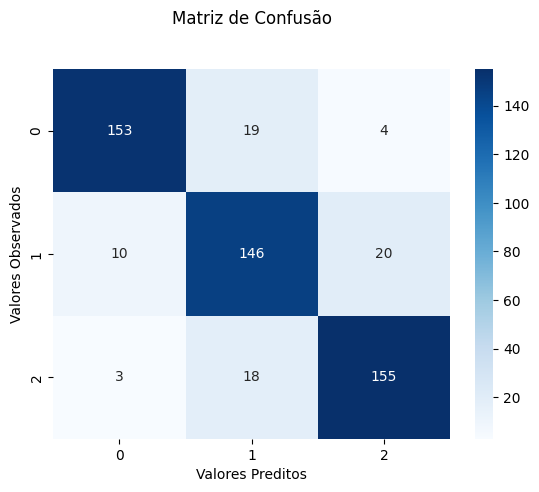

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

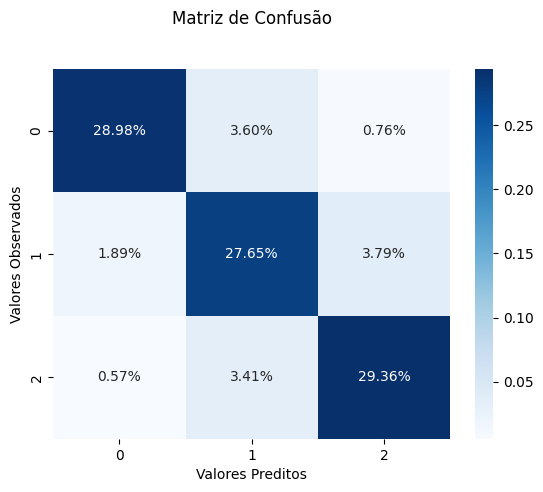

In [ ]:
import numpy as np

sns.heatmap(matriz_confusao/np.sum(matriz_confusao),
            annot=True, fmt='.2%', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       176
           1       0.80      0.83      0.81       176
           2       0.87      0.88      0.87       176

    accuracy                           0.86       528
   macro avg       0.86      0.86      0.86       528
weighted avg       0.86      0.86      0.86       528



In [ ]:
'''
X_original = df[['LB', 'AC', 'FM', 'UC', 'DP', 'ASTV', 'ALTV',
       'Nmax', 'Mode', 'Mean',
       'Variance']]
X_original = sm.add_constant(X_original)
y_original = df['NSP']
y_pred_original = modelo.predict(X_original).idxmax(axis=1)
'''

"\nX_original = df[['LB', 'AC', 'FM', 'UC', 'DP', 'ASTV', 'ALTV',\n       'Nmax', 'Mode', 'Mean',\n       'Variance']]\nX_original = sm.add_constant(X_original)\ny_original = df['NSP']\ny_pred_original = modelo.predict(X_original).idxmax(axis=1)\n"

In [ ]:
'''
from sklearn.metrics import classification_report

print(classification_report(y_original, y_pred_original))
'''

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1655
           1       0.55      0.85      0.67       295
           2       0.70      0.87      0.77       176

    accuracy                           0.86      2126
   macro avg       0.75      0.86      0.79      2126
weighted avg       0.90      0.86      0.88      2126



In [ ]:
'''
matriz_confusao_original = confusion_matrix(y_original, y_pred_original)
matriz_confusao_original
'''

array([[1435,  184,   36],
       [  15,  250,   30],
       [   4,   19,  153]])

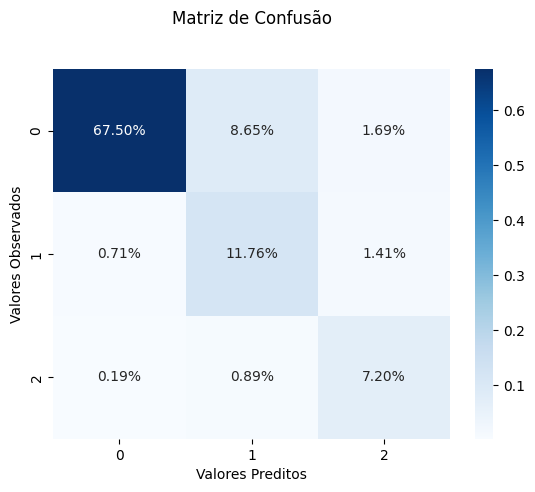

In [ ]:
'''
import numpy as np

sns.heatmap(matriz_confusao_original/np.sum(matriz_confusao_original),
            annot=True, fmt='.2%', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');
'''

In [ ]:
'''
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))
'''

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       176
           1       0.78      0.82      0.80       176
           2       0.87      0.88      0.88       176

    accuracy                           0.85       528
   macro avg       0.85      0.85      0.85       528
weighted avg       0.85      0.85      0.85       528



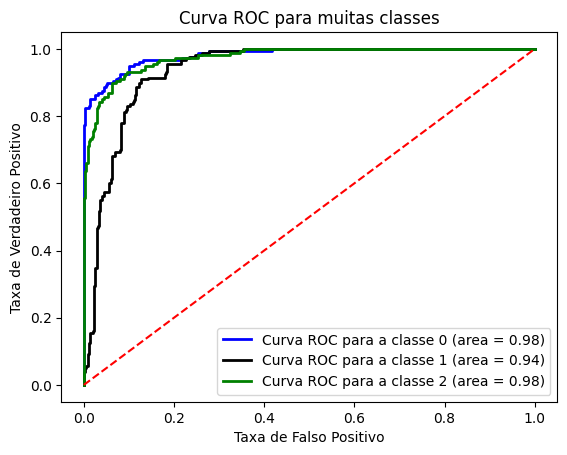

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_cat = label_binarize(y, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
colors = ['blue','black','green','yellow']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], modelo.predict(X).iloc[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Curva ROC para a classe {i} (area = {round(roc_auc[i], 2)})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC para muitas classes')
plt.legend(loc="lower right");

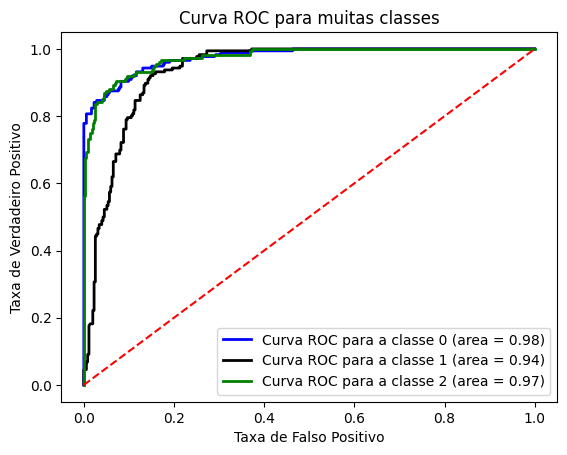

In [ ]:
'''
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_cat = label_binarize(y, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
colors = ['blue','black','green','yellow']

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], modelo.predict(X).iloc[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Curva ROC para a classe {i} (area = {round(roc_auc[i], 2)})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC para muitas classes')
plt.legend(loc="lower right");
'''

## Atividade 5: Faça a previsão para um paciente que apresenta as seguintes características:

* `LB` = 121
* `AC` = 0.004176
* `FM` = 0.0
* `UC` = 0.007541
* `DL` = 0.003176
* `DS` = 0.0
* `DP` = 0.0
* `ASTV` = 20
* `mSTV` = 2.3
* `ALTV` = 0
* `mLTV` = 11.5
* `Width` = 129
* `Min` = 54
* `Max` = 171
* `Nmax` = 5
* `Nzeros` = 0
* `Mode` = 140
* `Mean` = 136
* `Median` = 123
* `Variance` = 14
* `Tendency` = 1

In [ ]:
# selecting only variables used in the model
x_prediction = {'const':[1],
                'LB': [121],
                'AC':[0.004176],
                'FM':[0.0],
                'UC':[0.007541],
                'DP':[0.0],
                'ASTV':[20],
                'ALTV':[0],
                'Nmax':[5],
                'Mode':[140],
                'Mean':[136],
                'Variance':[14]}
x_prediction = pd.DataFrame(x_prediction)

#prediction = (modelo.predict(x_prediction) >= 0.5).astype(int)
prediction = modelo.predict(x_prediction)

print(prediction)

          0         1             2
0  0.998909  0.001091  2.203647e-10


In [ ]:
print(prediction.idxmax(axis=1)[0])

0
